# Proceso ETL (Extracción, Transformación, Carga) del proyecto Consumo Consciente

## Importación de librerias 

In [25]:
import numpy as np #Sirve par apoder ealizar procesamientos basicos numericos de datos cuantitativos
import pandas as pd #Sirve para reutilizar los procesos ETL en un conjunto de Datos
import time #Sirve para la manipulacion de datos en diferentes formatos de tiempo
import sqlalchemy  #Sirve para conectarte y trabajar con bases de datos relacionales (MySQL, PostgreSQL, SQLite, SQL Server, etc.).

# Graficadores (Plots)

import matplotlib.pyplot as plt #Librería base para gráficos en 2D.
import plotly.express as px #Se usa mucho para análisis estadístico visual.
import seaborn as sns #Para gráficos interactivos y dinámicos.

In [4]:
!cd
!dir

C:\Users\dell\9B\Integradora
 El volumen de la unidad C es SSD
 El número de serie del volumen es: 780D-6F6E

 Directorio de C:\Users\dell\9B\Integradora

19/08/2025  07:16 a. m.    <DIR>          .
19/08/2025  06:37 a. m.    <DIR>          ..
19/08/2025  06:38 a. m.    <DIR>          .ipynb_checkpoints
19/08/2025  06:58 a. m.             2,683 ConsumoConciente.ipynb
19/08/2025  06:38 a. m.        73,710,595 db_cc.sql
19/08/2025  07:16 a. m.        20,432,092 products.csv
               3 archivos     94,145,370 bytes
               3 dirs   1,034,985,472 bytes libres


In [7]:
df = pd.read_csv('products.csv', encoding="latin1")

In [8]:
# Corroboramos tipo de dato en nuestro objeto

print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [10]:
# Informacion sobre el contenido
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107312 entries, 0 to 107311
Data columns (total 1 columns):
 #   Column                                                                                                                              Non-Null Count   Dtype 
---  ------                                                                                                                              --------------   ----- 
 0   id;"name";"category";"carbon_footprint";"recyclable_packaging";"local_origin";"image_url";"price";"status";"quantity";"created_by"  107312 non-null  object
dtypes: object(1)
memory usage: 838.5+ KB


## Revisar importacion de los datos y conocer su composición

In [14]:
#Tamaño del dataframe
df.size

107312

In [13]:
#Devolver los primeros 5 valores
print(df.head) ## Devuelve los primeros y los ultimos 5 registros o tuplas de data frame

<bound method NDFrame.head of        id;"name";"category";"carbon_footprint";"recyclable_packaging";"local_origin";"image_url";"price";"status";"quantity";"created_by"
0       1;"Bragas térmicas de lino reciclado (Edición ...                                                                                
1       2;"Repisa de plastico reciclado (Diseño circul...                                                                                
2       3;"Reloj de pared de materiales mixtos (Multiu...                                                                                
3       4;"Detergente en pastilla de Sin quimicos (Sin...                                                                                
4       5;"Protector solar de orgánico (Dermatológico)...                                                                                
...                                                   ...                                                                                
1073

In [15]:
df.describe() ## Realiza un reporte estadisticos sobre columnas completamente numericos (cuantitativos)

,"id;""name"";""category"";""carbon_footprint"";""recyclable_packaging"";""local_origin"";""image_url"";""price"";""status"";""quantity"";""created_by"""
count,107312
unique,107312
top,"1;""Bragas térmicas de lino reciclado (Edición ..."
freq,1


In [16]:
df.isnull() ## Mapea la matriz original con una matriz

,"id;""name"";""category"";""carbon_footprint"";""recyclable_packaging"";""local_origin"";""image_url"";""price"";""status"";""quantity"";""created_by"""
0,False
1,False
2,False
3,False
4,False
...,...
107307,False
107308,False
107309,False
107310,False


# Transformar los Datos para su Ánalisis

In [17]:
df_duplicados_eliminados= df.drop_duplicates() ## Este metodo elimina los datos duplicados en base al criterio de la totalidad de los datos, esto se debe realizar
                    ## con extrema cautela dato que si no se tiene un atributo indentificar se alteraran resultados esperados

In [18]:
df_duplicados_eliminados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107312 entries, 0 to 107311
Data columns (total 1 columns):
 #   Column                                                                                                                              Non-Null Count   Dtype 
---  ------                                                                                                                              --------------   ----- 
 0   id;"name";"category";"carbon_footprint";"recyclable_packaging";"local_origin";"image_url";"price";"status";"quantity";"created_by"  107312 non-null  object
dtypes: object(1)
memory usage: 838.5+ KB


In [19]:
df_vacios_eliminados= df.dropna()

In [20]:
df_vacios_eliminados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107312 entries, 0 to 107311
Data columns (total 1 columns):
 #   Column                                                                                                                              Non-Null Count   Dtype 
---  ------                                                                                                                              --------------   ----- 
 0   id;"name";"category";"carbon_footprint";"recyclable_packaging";"local_origin";"image_url";"price";"status";"quantity";"created_by"  107312 non-null  object
dtypes: object(1)
memory usage: 838.5+ KB


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107312 entries, 0 to 107311
Data columns (total 1 columns):
 #   Column                                                                                                                              Non-Null Count   Dtype 
---  ------                                                                                                                              --------------   ----- 
 0   id;"name";"category";"carbon_footprint";"recyclable_packaging";"local_origin";"image_url";"price";"status";"quantity";"created_by"  107312 non-null  object
dtypes: object(1)
memory usage: 838.5+ KB


In [23]:
print("DataFrame Original:")
print(len(df))
print("DataFrame sin datos nulos en la columna:")
print(len(df_vacios_eliminados))

DataFrame Original:
107312
DataFrame sin datos nulos en la columna:
107312


# Graficación básica

In [28]:
df = pd.read_csv("products.csv", encoding="latin1", sep=";")

print(df.columns)   # Ahora deberían salir columnas separadas correctamente
print(df.head()) 

Index(['id', 'name', 'category', 'carbon_footprint', 'recyclable_packaging',
       'local_origin', 'image_url', 'price', 'status', 'quantity',
       'created_by'],
      dtype='object')
   id                                               name  category  \
0   1  Bragas térmicas de lino reciclado (Edición lim...      Ropa   
1   2     Repisa de plastico reciclado (Diseño circular)     Hogar   
2   3    Reloj de pared de materiales mixtos (Multiusos)      Otro   
3   4  Detergente en pastilla de Sin quimicos (Sin fr...  Limpieza   
4   5        Protector solar de orgánico (Dermatológico)     Salud   

   carbon_footprint  recyclable_packaging  local_origin  \
0             18.07                     1             1   
1              6.05                     1             0   
2              6.10                     0             0   
3              4.73                     0             0   
4             10.65                     0             1   

                                    

In [36]:
df = pd.read_csv("products.csv", encoding="latin1", sep=";")

# Limpieza de nombres de columnas (por si tienen comillas)
df.columns = df.columns.str.replace('"', '').str.strip()

print(df.columns)   # Para confirmar que ya existe "status" y "carbon_footprint"
print(df.head())

Index(['id', 'name', 'category', 'carbon_footprint', 'recyclable_packaging',
       'local_origin', 'image_url', 'price', 'status', 'quantity',
       'created_by'],
      dtype='object')
   id                                               name  category  \
0   1  Bragas térmicas de lino reciclado (Edición lim...      Ropa   
1   2     Repisa de plastico reciclado (Diseño circular)     Hogar   
2   3    Reloj de pared de materiales mixtos (Multiusos)      Otro   
3   4  Detergente en pastilla de Sin quimicos (Sin fr...  Limpieza   
4   5        Protector solar de orgánico (Dermatológico)     Salud   

   carbon_footprint  recyclable_packaging  local_origin  \
0             18.07                     1             1   
1              6.05                     1             0   
2              6.10                     0             0   
3              4.73                     0             0   
4             10.65                     0             1   

                                    

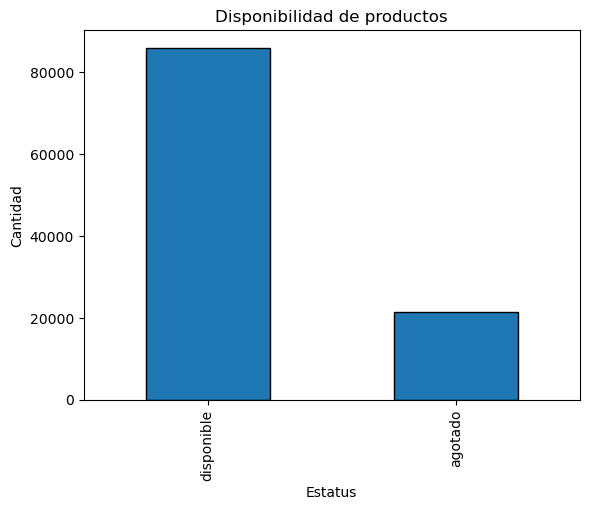

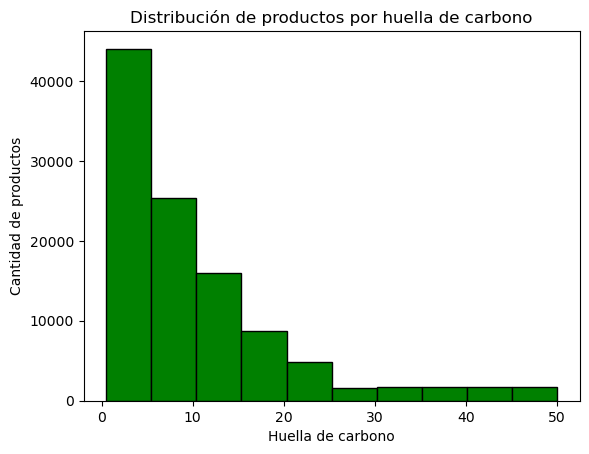

In [42]:
# --- 1. Estatus disponible vs agotado ---
status_counts = df['status'].value_counts()

status_counts.plot(kind="bar", edgecolor="black")
plt.title("Disponibilidad de productos")
plt.xlabel("Estatus")
plt.ylabel("Cantidad")
plt.show()

# --- 2. Distribución de huella de carbono ---
plt.hist(df['carbon_footprint'], bins=10, color="green", edgecolor="black")
plt.title("Distribución de productos por huella de carbono")
plt.xlabel("Huella de carbono")
plt.ylabel("Cantidad de productos")
plt.show()

In [34]:
df.columns = df.columns.str.replace('"', '')
print(df.columns)


Index(['id;name;category;carbon_footprint;recyclable_packaging;local_origin;image_url;price;status;quantity;created_by'], dtype='object')


In [40]:
print(df.columns.tolist())   # lista exacta de los nombres de columnas
print(df.head())     

['id;"name";"category";"carbon_footprint";"recyclable_packaging";"local_origin";"image_url";"price";"status";"quantity";"created_by"']
  id;"name";"category";"carbon_footprint";"recyclable_packaging";"local_origin";"image_url";"price";"status";"quantity";"created_by"
0  1;"Bragas térmicas de lino reciclado (Edición ...                                                                                
1  2;"Repisa de plastico reciclado (Diseño circul...                                                                                
2  3;"Reloj de pared de materiales mixtos (Multiu...                                                                                
3  4;"Detergente en pastilla de Sin quimicos (Sin...                                                                                
4  5;"Protector solar de orgánico (Dermatológico)...                                                                                


In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# 📌 Forzamos a pandas a usar ; como delimitador y que trate las comillas correctamente
df = pd.read_csv("products.csv", encoding="latin1", sep=";", quotechar='"')

# Normalizamos nombres de columnas (quitamos espacios, minúsculas)
df.columns = df.columns.str.strip().str.lower()

print(df.columns.tolist())
print(df.head())

['id', 'name', 'category', 'carbon_footprint', 'recyclable_packaging', 'local_origin', 'image_url', 'price', 'status', 'quantity', 'created_by']
   id                                               name  category  \
0   1  Bragas térmicas de lino reciclado (Edición lim...      Ropa   
1   2     Repisa de plastico reciclado (Diseño circular)     Hogar   
2   3    Reloj de pared de materiales mixtos (Multiusos)      Otro   
3   4  Detergente en pastilla de Sin quimicos (Sin fr...  Limpieza   
4   5        Protector solar de orgánico (Dermatológico)     Salud   

   carbon_footprint  recyclable_packaging  local_origin  \
0             18.07                     1             1   
1              6.05                     1             0   
2              6.10                     0             0   
3              4.73                     0             0   
4             10.65                     0             1   

                                           image_url   price      status  \
0  

# Exportación de dataFrame

In [43]:
df.to_csv("products_export.csv", index=False, encoding="utf-8")